In [1]:
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np

# Set up the plotting template
pio.templates["custom"] = pio.templates["plotly"]
pio.templates["custom"].layout.margin = dict(l=0, r=0, t=50, b=0)
pio.templates.default = "custom"

# Input signal with high frequency injected between points 500-600

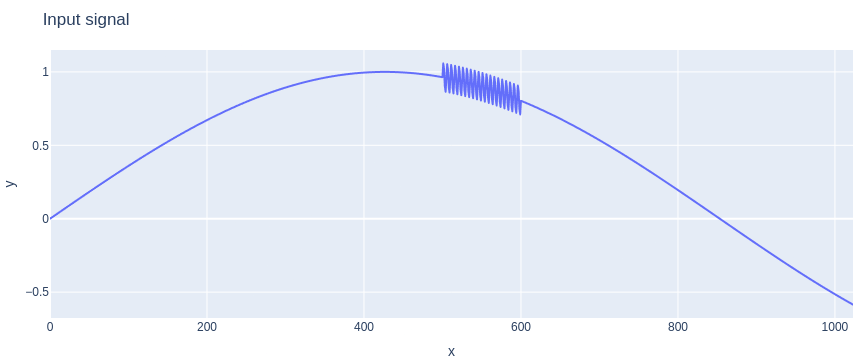

In [6]:
# Define an input signal with two distinct frequencies
N = 1024
samples = np.arange(N)
input_signal = np.sin(2*np.pi*samples*0.6/N)
input_signal[500:600] = input_signal[500:600] + 0.1*np.sin(2*np.pi*samples[500:600]*20/100)
fig = px.line(x=samples, y=input_signal, title="Input signal")
fig.show()

## Create a low-pass recursive filter to remove the high frequency injection
Recursive filters use previous inputs and outputs to calculate the Nth value, and they have the form:
$$
y[n] = a_0x[n]+a_1x[n-1]+a_2x[n-2]+ ... +b_1y[n-1]+b_2y[n-2]+ ...
$$
The number of inputs and outputs that you use to calculate a given value depends on the number of coefficients you supply to the equation. In practice, no more than about a dozen recursion coefficients can be used or the filter becomes unstable. Notice that there is no $b_0$ coefficient, because $b_0$ would pertain to the $y$ value we are trying to calculate

**Calculating the coefficients**\
For a single pole low-pass filter:
$$
a_0=1-x
$$
$$
b_1=x
$$
For a single pole high-pass filter:
$$
a_0=\frac{1+x}{2}
$$
$$
a_1=-\frac{1+x}{2}
$$
$$
b_1=x
$$
The characteristics of these filters are controlled by the parameter $x$, a value between 0 and 1. Physically, $x$ is the amount of *decay* between adjacent samples. The higher the value of $x$, the slower the decay.

I realize it's unfortunate that the input signal is defined as $x$ and our controlling parameter is also defined as $x$. Bear with me.

In [3]:
x = 0.85
a0 = 1-x
b1 = x

# Create the new signal run through the low-pass filter
low_pass = np.zeros(N)
low_pass[0] = a0*input_signal[0]
for n,val in enumerate(low_pass[1:]):
    low_pass[n] = a0*input_signal[n] + b1*low_pass[n-1]


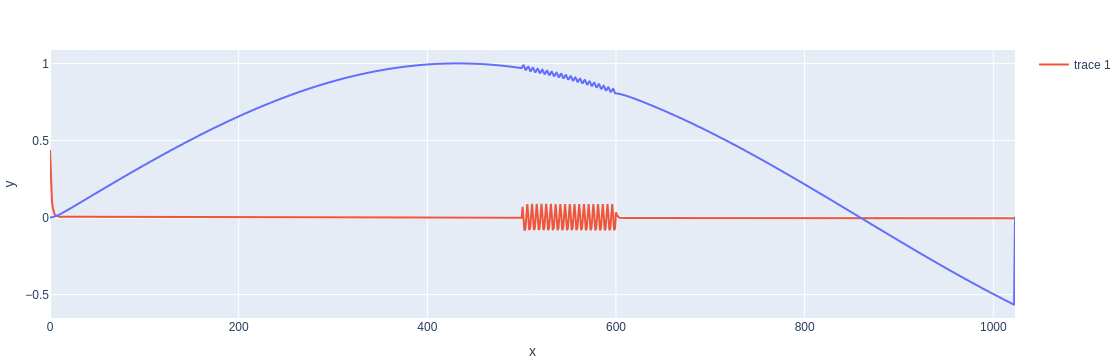

In [4]:
x = 0.5
a0 = (1+x)/2
a1 = -a0
b1 = x

high_pass = np.zeros(N)
high_pass[0] = a0*input_signal[0]
for n,val in enumerate(high_pass[1:]):
    high_pass[n] = a0*input_signal[n] + a1*input_signal[n-1] + b1*high_pass[n-1]

fig = px.line(x=samples, y=low_pass)
fig.add_trace(go.Scatter(x=samples, y=high_pass))
fig.show()

Notice that the high frequency signal in `low_pass` is significantly attenuated, and likewise the low frequency signal in `high_pass`. Play around with the value of $x$ to see how the signal changes.